In [4]:
# 路径没有加载，需要os导入内存
import os
os.chdir(".")

In [5]:
ls

 驱动器 E 中的卷是 新加卷
 卷的序列号是 649B-E779

 E:\python\Learn\DL\one_layer 的目录

2020/05/16  09:31    <DIR>          .
2020/05/16  09:31    <DIR>          ..
2020/05/15  11:43    <DIR>          .ipynb_checkpoints
2020/05/16  09:25    <DIR>          __pycache__
2020/05/16  09:31           125,661 one_hide_layer.ipynb
2020/05/15  16:19             2,167 planar_utils.py
               2 个文件        127,828 字节
               4 个目录  5,463,748,608 可用字节


In [109]:
import numpy as np
import matplotlib.pyplot as plt
# from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


In [67]:
X, Y = load_planar_dataset()

In [75]:
X.shape

(2, 400)

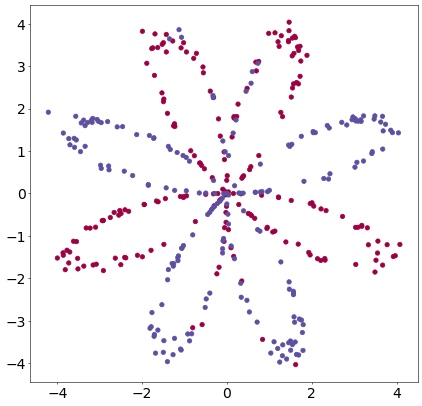

In [69]:
# 查看数据的图像
plt.rcParams['font.size'] = 20
plt.figure(figsize=(10,10),dpi=50)
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral) #绘制散点图

### 通过逻辑回归进行预测 

In [96]:
logic=sklearn.linear_model.LogisticRegressionCV()
logic.fit(X.T,np.squeeze(Y.T))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Logistic Regression')

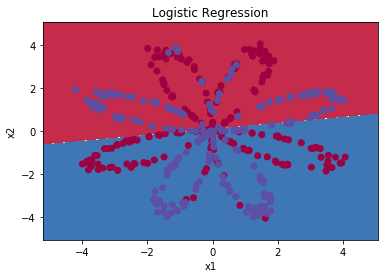

In [97]:
plot_decision_boundary(lambda x: logic.predict(x), X, Y) #看通过线性回归对各个点的分类，本意为将红蓝两个类别分开
plt.title("Logistic Regression")

In [88]:
log_pre=logic.predict(X.T)
# 计算对红蓝分类都正确的正确率
print("逻辑回归的准确率："+str((float((np.dot(Y,log_pre)+np.dot(1-Y,1-log_pre)))/Y.size)*100)+"%")

逻辑回归的准确率：47.0%


### 构建单层神经网络模型

In [14]:
# 初始化网络参数
def initialize(X,Hide,Y):
    """
    参数：
        X - 训练数据
        Hide - 为隐藏层的神经元个数
        Y - output层的输出神经元个数,也是最终累别的个数
    模型的形状，需要创建对应attribute个的weight，attribute的个数其实就是pixel的个数=height*width*channel
    bias的初始化只需声明一个实数，因为遵循广播原则，所以会自动补齐
    
    返回：
        w1 - 第一层带有随机初始化的权重矩阵
        b1 - 第一层带有初始化的bias矩阵
        w2 - 第二层带有随机初始化的权重矩阵
             对应隐层个数
        b2 - 第二层带有初始化的bias矩阵
        
    对应shape个的weitht和单独的bias,且满足标准正态分布
    """
    np.random.seed(2)
    # 其中初始化参数不能为0,防止每次更新无效且要尽可能小所以
    w1=np.random.randn(Hide,X.shape[0])*0.01
    b1=np.zeros((Hide,1))
    w2=np.random.randn(Y.shape[0],Hide)*0.01
    b2=np.zeros((Y.shape[0],1))
    assert(w1.shape==(Hide,X.shape[0]))
    # 这里的Hide相当于输入层的x的attribute的个数，Y.shape[0]相当于下一层的隐层单元数
    assert(w2.shape==(Y.shape[0],Hide))
    
    params={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2,
        
        
    }
    return params
    

In [15]:
params=initialize(X,4,Y)
print("w1:",grads["w1"])
print("b1:",grads["b1"])
print("w2:",grads["w2"])
print("b2:",grads["b2"])

w1: [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1: [[0.]
 [0.]
 [0.]
 [0.]]
w2: [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2: [[0.]]


In [19]:
# 构建模型
def build_model(params,X,Y):
    """
    参数：
        w1  - 输入层权重，大小不等的数组（隐藏层神经元个数，attribute个数）
        b1  - 输入层偏差，一个标量
        w2  - 第一层权重，大小不等的数组（输出层神经元的个数，隐藏层神经元个数）
        b2  - 第一层偏差，一个标量
        X  - 矩阵类型为（2，训练数量）
        Y  - 真正的“标签”矢量,(0为红色，1为蓝色)矩阵维度为(1,训练数据数量)

    返回：
        cost- 神经网络的对数似然成本
        dw1  - 相对于w1的损失梯度，因此与w1相同的形状
        db1  - 相对于b1的损失梯度，因此与b1的形状相同
        dw1  - 相对于w2的损失梯度，因此与w2相同的形状
        db1  - 相对于b2的损失梯度，因此与b2的形状相同
    
    实现前向和后向传播的成本函数及其梯度
   """
    w1=params["w1"]
    b1=params["b1"]
    w2=params["w2"]
    b2=params["b2"]
    # 样本个数  
    s=Y.shape[1]
#  正向传播
    # 输入层或0层     
    z1=np.dot(w1,X)+b1
    # 使用tanh激活函数
    a1=np.tanh(z1)
    
    # 隐藏层或者第一层
    z2=np.dot(w2,a1)+b2
    
    a2=sigmoid(z2)
    
    # 计算对数似然损失
    
    # np.multiply和*（在数组情况下）作用一致
    J=-(Y*np.log(a2)+(1-Y)*np.log(1-a2))
    cost=float((1/s)*J.sum())
    
#  反向传播
    # 输出层
    dz2=a2-Y
    dw2=(1/s)*np.dot(dz2,a1.T)
    db2=(1/s)*np.sum(dz2,axis=1,keepdims=True)
    #隐藏层
    dz1=np.multiply(np.dot(w2.T,dz2),(1-np.power(a1,2)))
    dw1=(1/s)*np.dot(dz1,X.T)
    db1=(1/s)*np.sum(dz1,axis=1,keepdims=True)
    
    assert(z1.shape==(w1.shape[0],X.shape[1]))
    assert(z2.shape==(Y.shape[0],Y.size))
    assert(isinstance(cost,int) or isinstance(cost,float))
    assert(dz2.shape==z2.shape)
    assert(dz1.shape==z1.shape)
    assert(dw2.shape==w2.shape)
    assert(dw1.shape==w1.shape)
    assert(db2.shape==b2.shape)
    assert(db1.shape==b1.shape)
    
    grads={
        "dw1":dw1,
        "db1":db1,
        "dw2":dw2,
        "db2":db2,
        "cost":cost
        
    }
    return grads

In [27]:
grads=build_model(params,X,Y)
print(grads)

{'dw1': array([[ 0.00023606, -0.00207914],
       [ 0.0002091 , -0.00178201],
       [-0.00012051,  0.0010843 ],
       [-0.00051496,  0.00449162]]), 'db1': array([[ 1.06848030e-07],
       [-9.70907252e-07],
       [-7.20012658e-08],
       [ 3.03048452e-07]]), 'dw2': array([[-1.75478714e-05,  3.70240274e-03, -1.25686736e-03,
        -2.55725650e-03]]), 'db2': array([[-1.0892314e-05]]), 'cost': 0.6930480201239823}


In [21]:
def optimize(params,grads,lr):
    """
      参数：
        X  - 维度为（2，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（红为0，蓝为1），矩阵维度为(1,训练数据的数量)
        iterations  - 优化循环的迭代次数
        lr  - 梯度下降更新规则的学习率
    
    返回：
        new_params - 更新后的参数
        cost - 优化期间计算的所有成本列表，将用于绘制学习曲线。
    """
    dw1=grads["dw1"]
    db1=grads["db1"]
    dw2=grads["dw2"]
    db2=grads["db2"]
    
    w1=params["w1"]
    b1=params["b1"]
    w2=params["w2"]
    b2=params["b2"]
    
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    
    new_params = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2,
                }
    
    
    
    return new_params
    
    
    

In [26]:
optimize(params,grads,1.2)

{'w1': array([[-0.00445085,  0.0019323 ],
        [-0.02161288,  0.01854112],
        [-0.01778975, -0.00971864],
        [ 0.00564676, -0.01784282]]),
 'b1': array([[-1.28217636e-07],
        [ 1.16508870e-06],
        [ 8.64015190e-08],
        [-3.63658142e-07]]),
 'w2': array([[-0.01055846, -0.01353296,  0.00702278,  0.02599079]]),
 'b2': array([[1.30707768e-05]])}

In [28]:
def model(X,Y,h,iterations,lr,print_cost = False):
    """
      参数：
        X - 维度为（height * weight * 3，训练数据的数量）的数组。
        Y - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        h - 隐藏层的节点数
        iterations - 优化循环的迭代次数
        lr - 梯度下降更新规则的学习率
        print_cost - 每100步打印一次损失值
    
    返回：
        params  - 包含权重w和偏差b的字典
        cost - 优化期间计算的所有成本列表，将用于绘制学习曲线。
    """
    np.random.seed(3)
    grads=initialize(X,h,Y)
    
    for i in range(iterations):
        params=build_model(grads,X,Y)
        new_params=optimize(grads,params,lr=lr)
        grads=new_params
        if print_cost:
            if i%100 == 0:
                print("第%d次迭代的cost：%f"%(i,params["cost"]))
    
    return new_params

In [92]:
def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    return X_assess, Y_assess
x,y=nn_model_test_case()
p=model(x,y,4,10000,1.2,print_cost=True)
print(p)

第0次迭代的cost：0.692584
第100次迭代的cost：-inf
第200次迭代的cost：-inf
第300次迭代的cost：-inf
第400次迭代的cost：-inf
第500次迭代的cost：-inf
第600次迭代的cost：-inf
第700次迭代的cost：-inf
第800次迭代的cost：-inf
第900次迭代的cost：-inf
第1000次迭代的cost：-inf
第1100次迭代的cost：-inf
第1200次迭代的cost：-inf
第1300次迭代的cost：-inf
第1400次迭代的cost：-inf
第1500次迭代的cost：-inf
第1600次迭代的cost：-inf
第1700次迭代的cost：-inf
第1800次迭代的cost：-inf
第1900次迭代的cost：-inf
第2000次迭代的cost：-inf
第2100次迭代的cost：-inf
第2200次迭代的cost：-inf
第2300次迭代的cost：-inf
第2400次迭代的cost：-inf
第2500次迭代的cost：-inf
第2600次迭代的cost：-inf

D:\python\Anaconda3\envs\learn\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log



第2700次迭代的cost：-inf
第2800次迭代的cost：-inf
第2900次迭代的cost：-inf
第3000次迭代的cost：-inf
第3100次迭代的cost：-inf
第3200次迭代的cost：-inf
第3300次迭代的cost：-inf
第3400次迭代的cost：-inf
第3500次迭代的cost：-inf
第3600次迭代的cost：-inf
第3700次迭代的cost：-inf
第3800次迭代的cost：-inf
第3900次迭代的cost：-inf
第4000次迭代的cost：-inf
第4100次迭代的cost：-inf
第4200次迭代的cost：-inf
第4300次迭代的cost：-inf
第4400次迭代的cost：-inf
第4500次迭代的cost：-inf
第4600次迭代的cost：-inf
第4700次迭代的cost：-inf
第4800次迭代的cost：-inf
第4900次迭代的cost：-inf
第5000次迭代的cost：-inf
第5100次迭代的cost：-inf
第5200次迭代的cost：-inf
第5300次迭代的cost：-inf
第5400次迭代的cost：-inf
第5500次迭代的cost：-inf
第5600次迭代的cost：-inf
第5700次迭代的cost：-inf
第5800次迭代的cost：-inf
第5900次迭代的cost：-inf
第6000次迭代的cost：-inf
第6100次迭代的cost：-inf
第6200次迭代的cost：-inf
第6300次迭代的cost：-inf
第6400次迭代的cost：-inf
第6500次迭代的cost：-inf
第6600次迭代的cost：-inf
第6700次迭代的cost：-inf
第6800次迭代的cost：-inf
第6900次迭代的cost：-inf
第7000次迭代的cost：-inf
第7100次迭代的cost：-inf
第7200次迭代的cost：-inf
第7300次迭代的cost：-inf
第7400次迭代的cost：-inf
第7500次迭代的cost：-inf
第7600次迭代的cost：-inf
第7700次迭代的cost：-inf
第7800次迭代的cost：-inf
第7900次迭代的co

In [87]:
def predict(params,X):
    """
    参数：
        params - 已经训练好的权重矩阵w1,w2
                 已经训练好的偏置量b1,b2
        x - 待预测的x数据
        
    返回：
        y_predict - 各个样本的预测值
    """
    w1=params["w1"]
    b1=params["b1"]
    w2=params["w2"]
    b2=params["b2"]
    
    # 输入层或0层     
    z1=np.dot(w1,X)+b1
    # 使用tanh激活函数
    a1=np.tanh(z1)
    
    # 隐藏层或者第一层
    z2=np.dot(w2,a1)+b2
    
    a2=sigmoid(z2)
    # 四舍五入     
    y_predict=np.round(a2)
    
    
    return y_predict

In [93]:
y_pre=predict(p,x)
acc=np.mean(np.equal(y_pre,y))
print(acc)

0.0


### 训练

In [90]:
new_p=model(X,Y,4,10000,1.2,print_cost=True)
y_pre=predict(new_p,X，Y)

print("acc:"+str(acc)+"%")

第0次迭代的cost：0.693048
第100次迭代的cost：0.604442
第200次迭代的cost：0.345510
第300次迭代的cost：0.321577
第400次迭代的cost：0.311199
第500次迭代的cost：0.304722
第600次迭代的cost：0.300018
第700次迭代的cost：0.296294
第800次迭代的cost：0.293178
第900次迭代的cost：0.290478
第1000次迭代的cost：0.288083
第1100次迭代的cost：0.285927
第1200次迭代的cost：0.283964
第1300次迭代的cost：0.282158
第1400次迭代的cost：0.280476
第1500次迭代的cost：0.278875
第1600次迭代的cost：0.277284
第1700次迭代的cost：0.275575
第1800次迭代的cost：0.273523
第1900次迭代的cost：0.270226
第2000次迭代的cost：0.254385
第2100次迭代的cost：0.250321
第2200次迭代的cost：0.247162
第2300次迭代的cost：0.244554
第2400次迭代的cost：0.242353
第2500次迭代的cost：0.240464
第2600次迭代的cost：0.238819
第2700次迭代的cost：0.237369
第2800次迭代的cost：0.236077
第2900次迭代的cost：0.234916
第3000次迭代的cost：0.233864
第3100次迭代的cost：0.232904
第3200次迭代的cost：0.232022
第3300次迭代的cost：0.231207
第3400次迭代的cost：0.230450
第3500次迭代的cost：0.229744
第3600次迭代的cost：0.229082
第3700次迭代的cost：0.228460
第3800次迭代的cost：0.227874
第3900次迭代的cost：0.227319
第4000次迭代的cost：0.226792
第4100次迭代的cost：0.226292
第4200次迭代的cost：0.225815
第4300次迭代的cost：0.225359


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

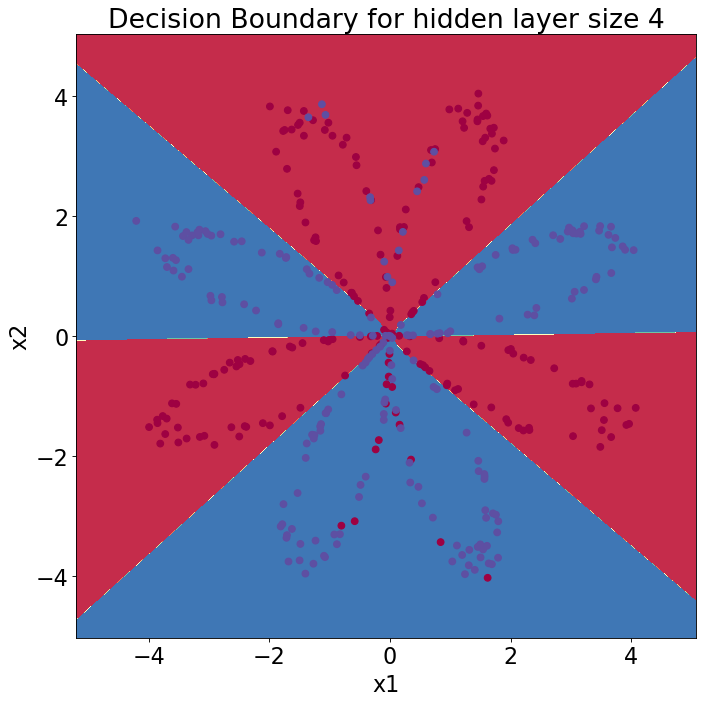

In [103]:
plt.rcParams['font.size'] = 20
plt.figure(figsize=(10,10),dpi=80)
# lambda 方法是为了在planar_utilis中能够调用predict方法，
plot_decision_boundary(lambda x: predict(new_p, x.T), X, Y)

plt.title("Decision Boundary for hidden layer size " + str(4))

隐藏层的节点数量： 1  ，准确率: 0.675 %
隐藏层的节点数量： 2  ，准确率: 0.6725 %
隐藏层的节点数量： 3  ，准确率: 0.91 %
隐藏层的节点数量： 4  ，准确率: 0.9075 %
隐藏层的节点数量： 5  ，准确率: 0.915 %
隐藏层的节点数量： 20  ，准确率: 0.93 %
隐藏层的节点数量： 50  ，准确率: 0.9025 %


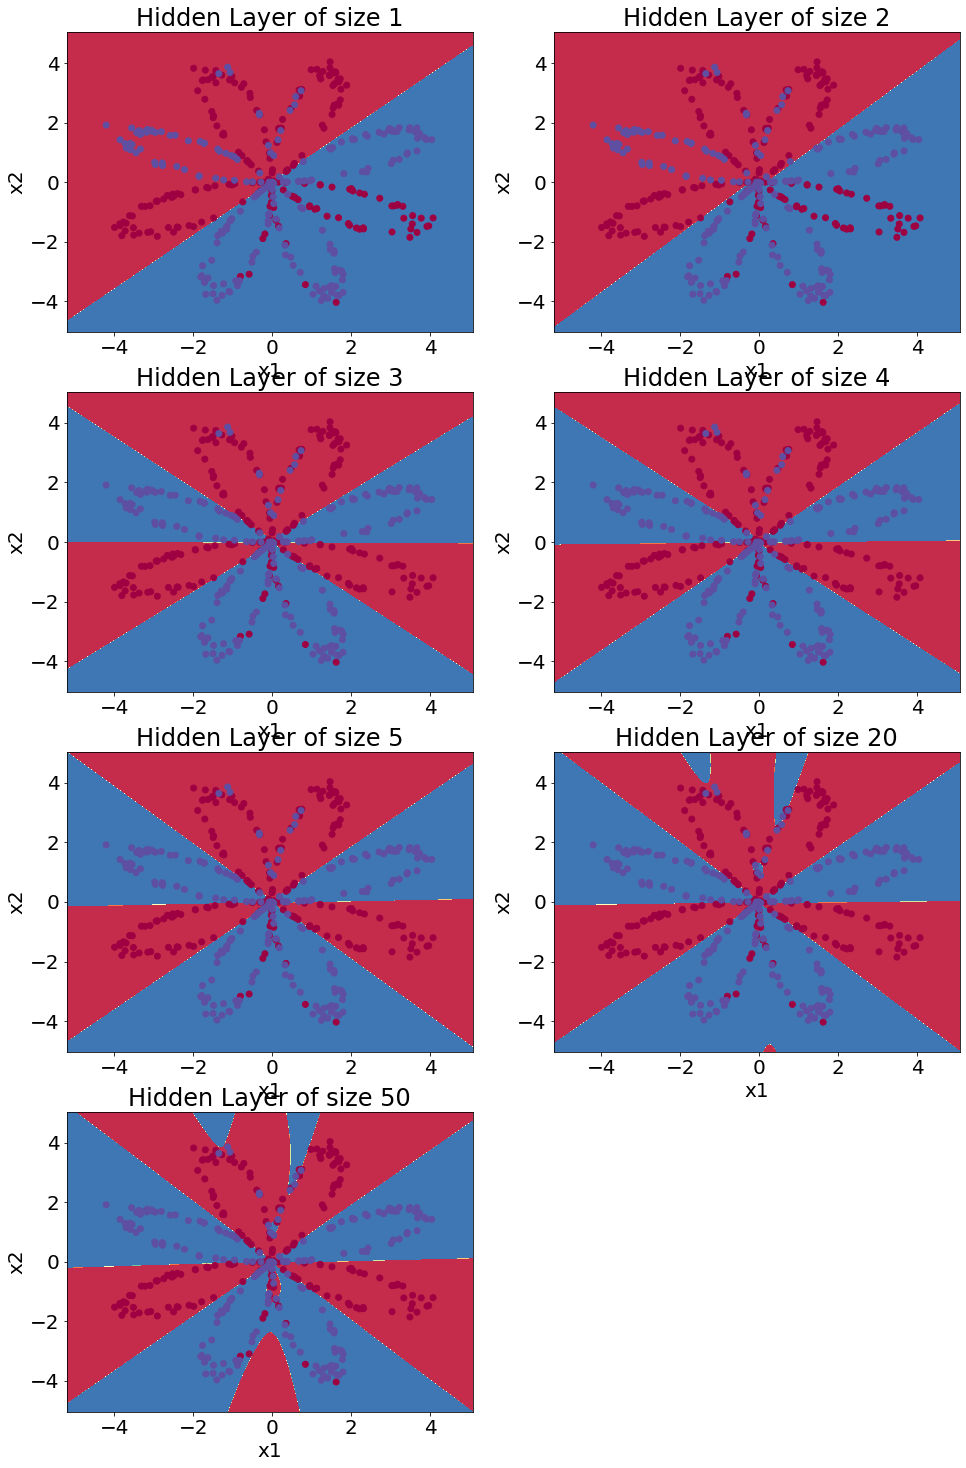

In [110]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50] #隐藏层数量
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    new_p=model(X,Y,n_h,10000,1.2)
    y_pre=predict(new_p,X)
    acc=np.mean(np.equal(y_pre,Y))
    plot_decision_boundary(lambda x: predict(new_p, x.T), X, Y)
    print ("隐藏层的节点数量： {}  ，准确率: {} %".format(n_h, acc))